# LendingClub Dataset
**Dataset Description：**
The dataset contains the loan records released from Lending Club. The problem lenders care is that whether a borrower can repay loan and interest on time. In addition, the loan interest rate is highly related to the loan credit of borrowers. A borrower with a higher credit can easily get loan with a lower rate. The task of the project is to predict whehter a borrower can repay loan and interest on time based on a number of features of the borrower. This is a typical classification problem and this notebook demonstrate how to use Lending Club dataset to decide whether a loan case should be approved based a borrower' features. 

**Dataset Detail Information*
The dataset contains 9,578 recrds in total. Every record has 13 features and 1 label which are described as below. 
* credit.policy: This is the label. Its value is 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

* purpose: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", “home_improvement” and "all_other").

* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

* installment: The monthly installments owed by the borrower if the loan is funded.

* log.annual.inc: The natural log of the self-reported annual income of the borrower.

* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

* fico: The FICO credit score of the borrower.Common FICO scores range from 300 to 850,with higher scores indicating better credit.

* days.with.cr.line: The number of days the borrower has had a credit line.

* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments

* not.fully.paid：Whether the borrower will be fully paid or not.

**Learning taks:**
Train classification models to predict "credit.policy" by using the other 13 features.

## Import Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')

c:\Users\Dell\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Load Dataset and Clean Dataset

The purpose of this part is to guarantee the data used in the notebook is reliable. 。

In [23]:
# load dataset
loan_df = pd.read_csv('loan_data.csv')
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,NaN
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,471000.000000,3511,25.6,1,0,0,0.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0.0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0.0


In [6]:
# general information
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9577 non-null   float64
dtypes: float64(7), int64(6), object(1)
memory usage: 1.0+ MB


The "not.fully.paid" feature has a missing record. As this feature only has 2 values, 0 and 1, we can use its mode value to replace the missing value. 

In [13]:
loan_df.groupby("not.fully.paid")["credit.policy"].count()

not.fully.paid
0.0    8044
1.0    1533
Name: credit.policy, dtype: int64

In [24]:
loan_df['not.fully.paid'] = loan_df['not.fully.paid'].fillna(loan_df['not.fully.paid'].mode()) 
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   float64
dtypes: float64(7), int64(6), object(1)
memory usage: 1.0+ MB


In [26]:
loan_df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.80,0.40,0.00,1.00,1.00,1.00,1.00
int.rate,9578.0,0.12,0.03,-0.15,0.10,0.12,0.14,0.22
installment,9578.0,319.09,207.07,15.67,163.77,268.95,432.76,940.14
log.annual.inc,9578.0,10.93,0.61,7.55,10.56,10.93,11.29,14.53
dti,9578.0,12.61,6.88,0.00,7.21,12.66,17.95,29.96
fico,9578.0,710.85,37.97,612.00,682.00,707.00,737.00,827.00
days.with.cr.line,9578.0,4609.45,5380.50,178.96,2820.00,4139.96,5730.00,471000.00
revol.bal,9578.0,16913.96,33756.19,0.00,3187.00,8596.00,18249.50,1207359.00
revol.util,9578.0,46.80,29.01,0.00,22.60,46.30,70.90,119.00
inq.last.6mths,9578.0,1.58,2.20,0.00,0.00,1.00,2.00,33.00


### Removing outliers

<Axes: >

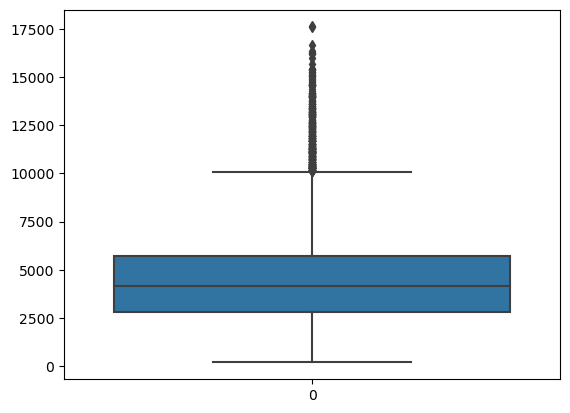

In [17]:
# remove outliers
loan_df = loan_df[~(loan_df['days.with.cr.line'] == 471000)]
sns.boxplot(loan_df["days.with.cr.line"])

<Axes: >

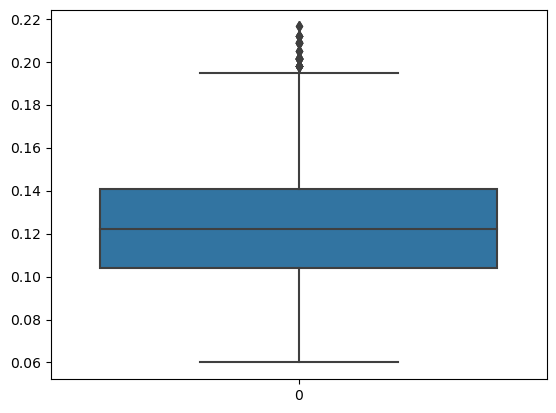

In [18]:
# remove outliers
loan_df = loan_df[~(loan_df['int.rate'] < 0)]
sns.boxplot(loan_df["int.rate"])

In [29]:
#sns.boxplot(loan_df["pub.rec"])
loan_df.groupby("pub.rec")["credit.policy"].count()

pub.rec
0    9019
1     533
2      19
3       5
4       1
5       1
Name: credit.policy, dtype: int64

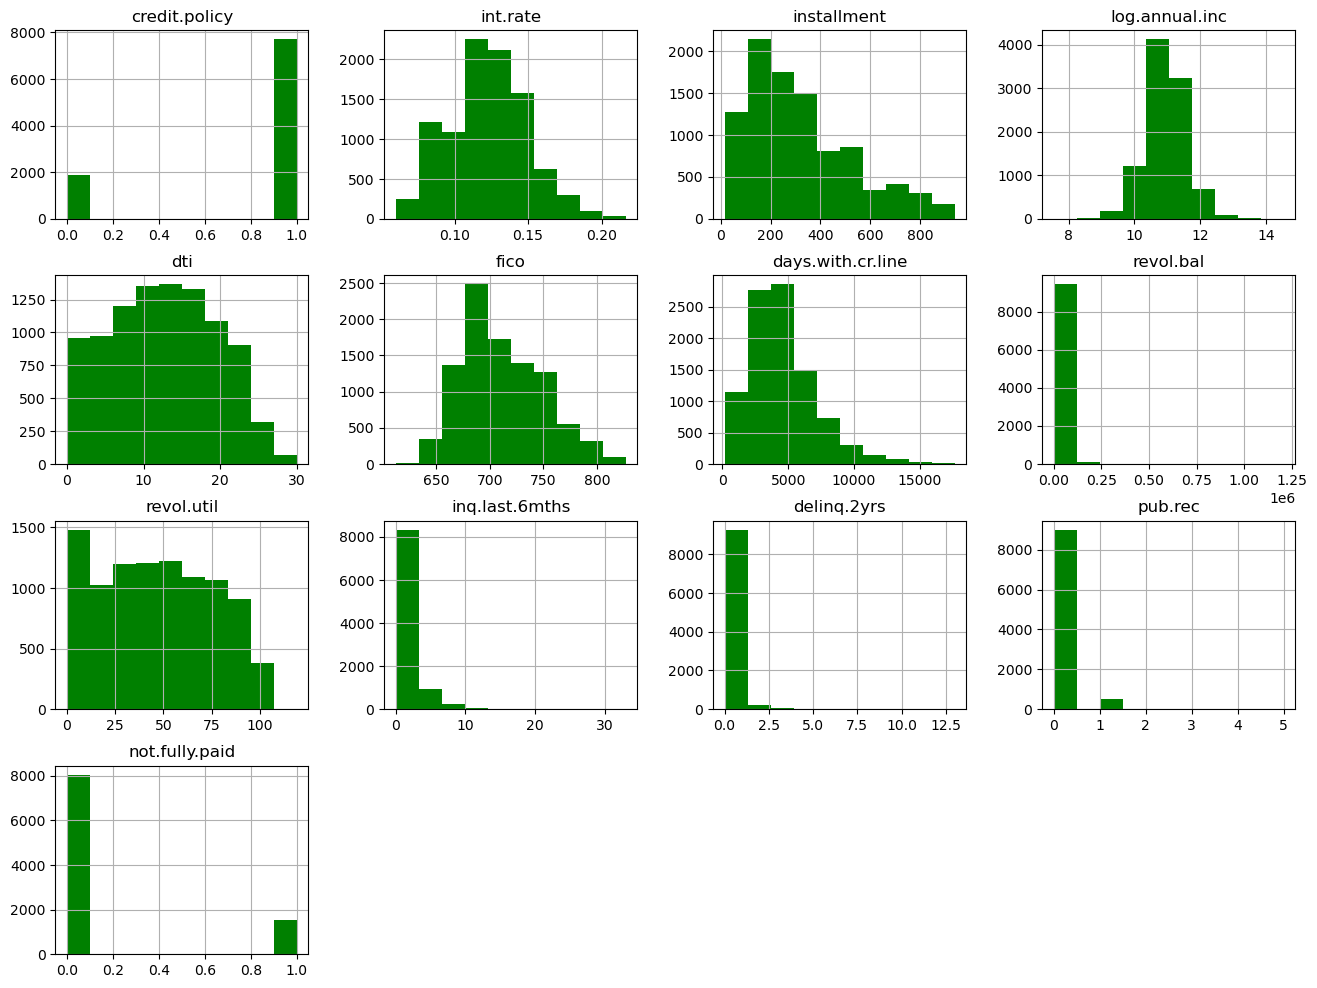

In [19]:
loan_df.hist(bins=10 ,figsize=(16,12), color = 'Green')
plt.show()
#loan_df.describe().transpose()

In [ ]:
# encode purpose variable - for decision tree model
from sklearn.preprocessing import LabelEncoder
#Data["purpose"] = LabelEncoder().fit_transform(Data["purpose"])
#Data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0.0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0.0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0.0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0.0
5,1,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0.0


Obviously, we can sight that the ranges of values are very different for different features. For example, the mean value of int.rate is 0.122570, but the mean value of revol.bal is more than 16,913. Such big discrepancy may significantly lower the utility of machine learning models. Therefore, we need to normalise these features. 
For normalisation, we can employ min-maxScaling or Standardization methods. 
Meanwhile, we can observe some extreme values in the dataset. For example, the minimum value of int.rate is less than 0, which is impossible in practice. The maxmimum value of days.with.cr.line is 4.71e5 days, equivalent to 1,290.41 years, which is also abnormal. To clean our dataset, we need to remedy these records with these extreme values.If 'int.rate' is negative  it will be replaced by the median value of 'int.rate'.  If 'days.with.cr.line' is greater than 36,500 days (or 100 years), it will be replaced by the median value of 'days.with.cr.line'

## Data Analytics and Classification

Now, our target is to train a logistic regression model and a decision tree model, respectively, to predict 'credit.policy' with 13 features. This is a typical classification problem. 
It is unnecessary to use all 13 features as input of the logistic regression model. To select relevant features, we can plot the heatmap between two features to filter relevant features as our input. 

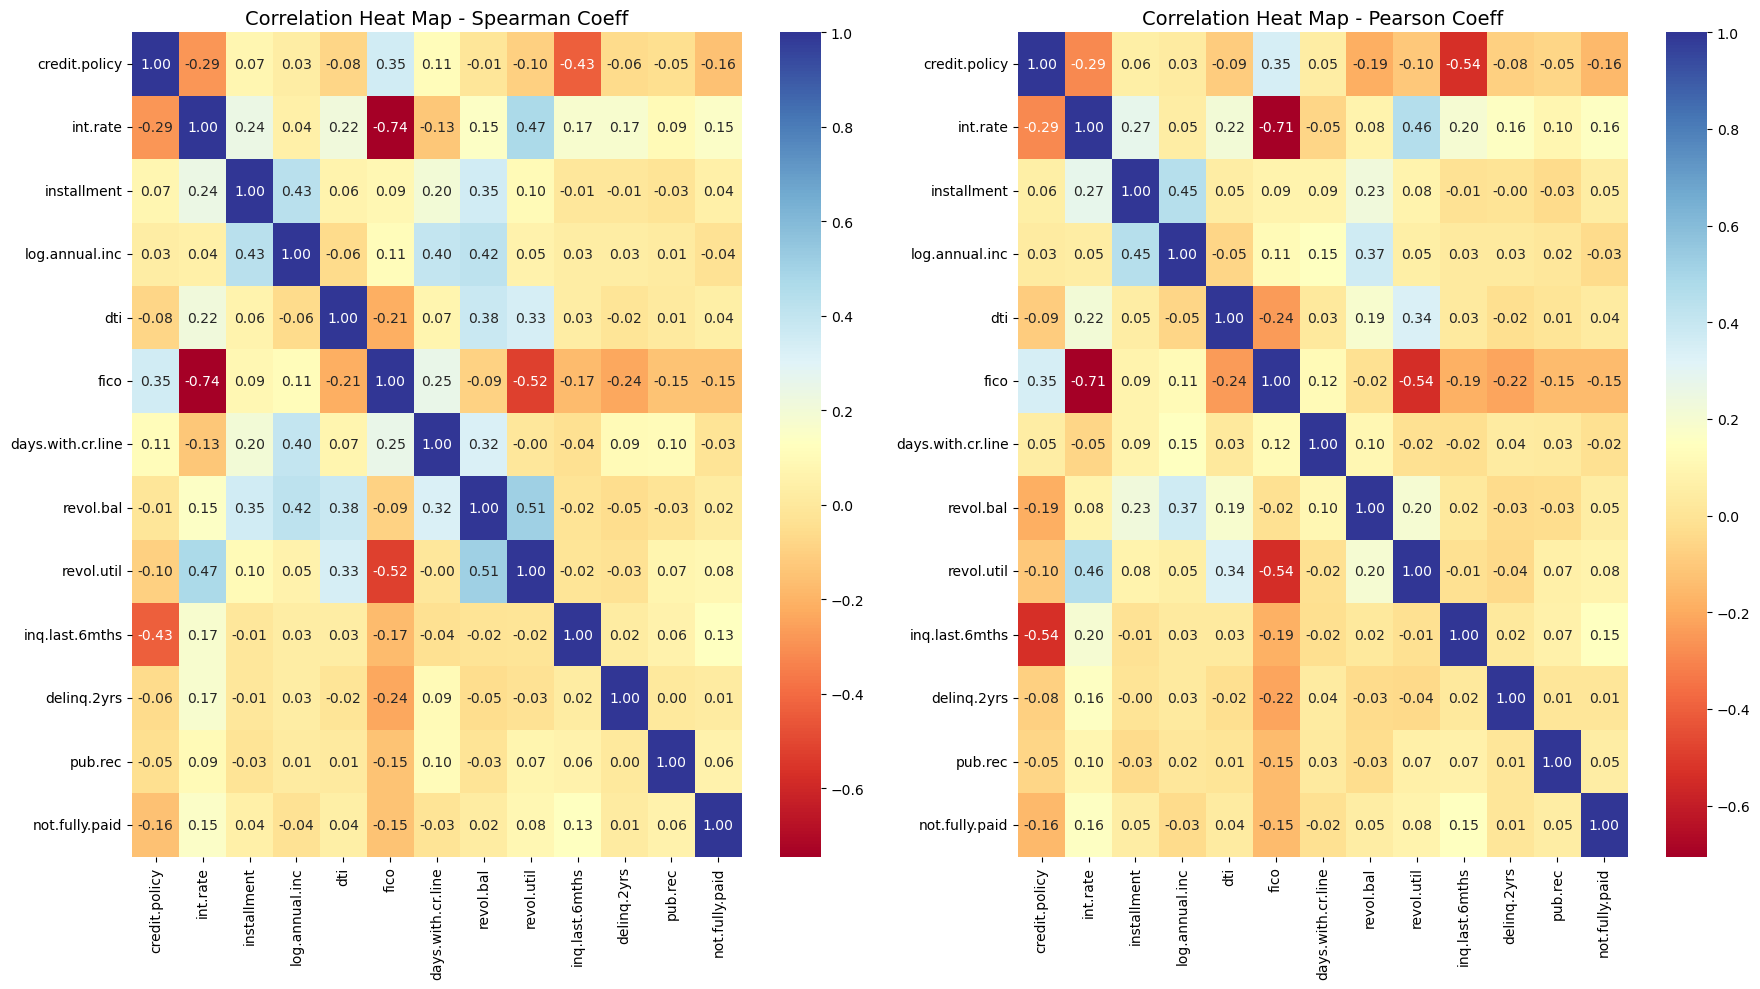

In [63]:
fig = plt.figure(figsize = (18,10))
ax1 = plt.subplot(121)
sns.heatmap(Data.corr('spearman'), annot = True, fmt = ".2f", cmap = "RdYlBu")
plt.title("Correlation Heat Map - Spearman Coeff", fontsize = 14)

ax2 = plt.subplot(122)
sns.heatmap(Data.corr('pearson'), annot = True, fmt = ".2f", cmap = "RdYlBu")
plt.title("Correlation Heat Map - Pearson Coeff", fontsize = 14)
plt.tight_layout()
plt.show()

From the heatmaps, we can find different correlations between each feature and 'credit.policy'. 
We only reserve features that have positive correlations with 'credit.policy' by removing all features, i.e., 'int.rate', 'revol.bal', 'inq.last.6mths' and 'not.fully.paid' which are negatively correlated with 'credit.policy'. We believe that features with negative correlations are useless for model training. 

## Data Preprocess

### Process of Object data type
The logistic regression model cannot well process the object data type. We convert this data type with OneHotEncoder such that this feature can be handled by the logistic regression model. 

In [ ]:
dummy_purpose = pd.get_dummies(Data['purpose'])
dummy_purpose.head() # OneHotEncoder - for logit model
New_Data = pd.concat((Data.iloc[:,0], dummy_purpose, Data.iloc[:,2:]), axis=1)
#New_Data = Data
New_Data.head()

,credit.policy,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0,1,0,0,0,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0.160071
1,1,0,1,0,0,0,0,0,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0.000000
2,1,0,0,1,0,0,0,0,0.1357,366.86,10.373491,11.63,682,471000.000000,3511,25.6,1,0,0,0.000000
3,1,0,0,1,0,0,0,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0.000000
4,1,0,1,0,0,0,0,0,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0.000000


### Dataset Splitting
We Split all data records into training set (80%), validation set (10%)  and test set (10%) so that we can determine hyper-parameters with k-cross validation. 

Sort all records by an ascending order of 'credit.policy'. and select the first 90% as the training and validation sets. The rest 10% will be used as the test set. 

We complete dataset splitting as below. 

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(New_Data, test_size=0.1, random_state=142)

x_ex1_train = train.drop(['credit.policy'], axis=1)
y_ex1_train = train['credit.policy']

x_ex1_test = test.drop(['credit.policy'], axis=1)
y_ex1_test = test['credit.policy']

print(train.shape)
print(test.shape)

(8620, 20)
(958, 20)


### Data normalisation
Recall that we have observed large value discrepancies between these features. It is necessary to normalise these features before we use them to train our models. 
Here, we emply standardization method to normalise our dataset as below. 

In [66]:
from sklearn.preprocessing import StandardScaler

obje_ss=StandardScaler()

x_ex1_train=obje_ss.fit_transform(x_ex1_train)
x_ex1_test=obje_ss.transform(x_ex1_test)

## Model Evaluation
In this stage, we are going to train a logistic regression model and a decision tree model. Cross validation will be used to determine hyper-parameters and evaluate model performance.

To simplify our code, we define two functions: onbtain_cross validition_results and plot_result

The conbtain_cross validition_results method will uniformly and randomly put records in the training and validation sets into k different folds. Validation will be conducted for k times. In each time, a single fold is used as the test set while the rest folds will be used as the training set. The evaluation results will be returned as a dictionary to facilitate plotting figures. 

The plot_function will take the dictionary obtained from onbtain_cross validition_results as input to plot figures. 


In [31]:
from sklearn.model_selection import cross_validate
def onbtain_cross_validition_results(model, _X, _y, _cv=9):
    '''Function to perform 5 Folds Cross-Validation
    Parameters
    ----------
    model: Python Class, default=None
        This is the machine learning algorithm to be used for training.
    _X: array
    This is the matrix of features.
    _y: array
    This is the target variable.
    _cv: int, default=9
    Determines the number of folds for cross-validation.
    Returns
    -------
    The function returns a dictionary containing the metrics 'accuracy', 'precision',
    'recall', 'f1' for both training set and validation set.
    '''

    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                        X=_X,
                        y=_y,
                        cv=_cv,
                        scoring=_scoring,
                        return_train_score=True)

    return {"Training Accuracy scores": results['train_accuracy'],
        "Mean Training Accuracy": results['train_accuracy'].mean()*100,
        "Training Precision scores": results['train_precision'],
        "Mean Training Precision": results['train_precision'].mean(),
        "Training Recall scores": results['train_recall'],
        "Mean Training Recall": results['train_recall'].mean(),
        "Training F1 scores": results['train_f1'],
        "Mean Training F1 Score": results['train_f1'].mean(),
        "Validation Accuracy scores": results['test_accuracy'],
        "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
        "Validation Precision scores": results['test_precision'],
        "Mean Validation Precision": results['test_precision'].mean(),
        "Validation Recall scores": results['test_recall'],
        "Mean Validation Recall": results['test_recall'].mean(),
        "Validation F1 scores": results['test_f1'],
        "Mean Validation F1 Score": results['test_f1'].mean()
        }

def plot_bar_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold","6th Fold", "7th Fold", "8th Fold", "9th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()
   
def plot_stacked_bar_charts(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        fig, ax =plt.subplots(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold","6th Fold", "7th Fold", "8th Fold", "9th Fold"]
        width = 0.35
        X_axis = np.arange(len(labels))
        ax.bar(labels, train_data, width,  label='Training')
        ax.bar(labels, val_data, width, bottom=train_data,
        label='Validation')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_title(plot_title)
        ax.legend()
        plt.show()

### Logistic Regression Model

In [67]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
log_result = onbtain_cross_validition_results(model_log, x_ex1_train, y_ex1_train, _cv=9)
print(log_result)

{'Training Accuracy scores': array([0.90211433, 0.90407204, 0.90394153, 0.90576873, 0.9045941 ,
       0.90589924, 0.90485513, 0.90630301, 0.90317108]), 'Mean Training Accuracy': 90.45243557803838, 'Training Precision scores': array([0.91850015, 0.91881862, 0.91919505, 0.92053903, 0.91925754,
       0.92055134, 0.91993186, 0.92084882, 0.9183421 ]), 'Mean Training Precision': 0.9195538343882927, 'Training Recall scores': array([0.96358908, 0.96586476, 0.96521456, 0.96602731, 0.96602731,
       0.96618986, 0.96553966, 0.96635241, 0.96521456]), 'Mean Training Recall': 0.9655577228724171, 'Training F1 scores': array([0.94050452, 0.9417545 , 0.94164288, 0.94273477, 0.9420623 ,
       0.94281862, 0.94218415, 0.94305203, 0.94119512]), 'Mean Training F1 Score': 0.9419943212724399, 'Validation Accuracy scores': array([0.91858038, 0.91440501, 0.9091858 , 0.89874739, 0.90292276,
       0.89039666, 0.8914405 , 0.89132706, 0.91431557]), 'Mean Validation Accuracy': 90.34801255663685, 'Validation Pre

To better understand our result, we visualize the performance evluation results as below. 


In [20]:
model_name = "Logistic Regression"

#plot_stacked_bar_charts(model_name, "Accuracy", "Accuracy scores in 9 Folds", log_result['Training Accuracy scores'], log_result['Validation Accuracy scores'])
#plot_stacked_bar_charts(model_name, "Precision", "Precision scores in 9 Folds", log_result['Training Precision scores'], log_result['Validation Precision scores'])
#plot_stacked_bar_charts(model_name, "Recall", "Recall scores in 9 Folds", log_result['Training Recall scores'], log_result['Validation Recall scores'])
#plot_stacked_bar_charts(model_name, "F1 scores", "F1 scores in 9 Folds", log_result['Training F1 scores'], log_result['Validation F1 scores'])

From the visualised results, we can observe that the model prediction performance is very good indicating that we have obtained an accurate model. 


### Decision Tree
We next train the decision tree model

In [69]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

tree_result = onbtain_cross_validition_results(model_tree, x_ex1_train, y_ex1_train, _cv=9)
print(tree_result)

{'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Mean Training F1 Score': 1.0, 'Validation Accuracy scores': array([0.98956159, 0.98538622, 0.99269311, 0.98538622, 0.99686848,
       0.98956159, 0.98851775, 0.99582027, 0.99477534]), 'Mean Validation Accuracy': 99.09522843436888, 'Validation Precision scores': array([0.99607843, 0.98709677, 0.99352332, 0.99217731, 0.9974026 ,
       0.99349805, 0.99348958, 1.        , 0.99739583]), 'Mean Validation Precision': 0.9945179888137307, 'Validation Recall scores': array([0.99089727, 0.99479844, 0.99739922, 0.98959688, 0.99869961,
       0.99349805, 0.99219766, 0.99479844, 0.99609883]), 'Mean Validation Recall': 0.9942

In [21]:
model_name = "Decision Tree"
#plot_bar_result(model_name, "Accuracy", "Accuracy scores in 9 Folds", tree_result['Training Accuracy scores'], tree_result['Validation Accuracy scores'])
#plot_bar_result(model_name, "Precision", "Precision scores in 9 Folds", tree_result['Training Precision scores'], tree_result['Validation Precision scores'])
#plot_bar_result(model_name, "Recall", "Recall scores in 9 Folds", tree_result['Training Recall scores'], tree_result['Validation Recall scores'])
#plot_bar_result(model_name, "F1 scores", "F1 scores in 9 Folds", tree_result['Training F1 scores'], tree_result['Validation F1 scores'])

From this result, we can observe that the performance on the training set is much higher than the performance on the validation set. It implies that the decision tree model is over-fitting the training set. 


### Tune hyper-parameter

Since the decision tree model is over-fitting, we need to tune hyper-parameters. 
Tuneable hyper-parameters in a decision tree model include 
* criterion:The function to measure the quality of a split.
* max_depth:The maximum depth of the tree.
* min_samples_split:The minimum number of samples required to split an internal node.
* min_samples_leaf:The minimum number of samples required to be at a leaf node.
For more information regarding these hyper-parameters, please refer to sklearn document:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [82]:
# We tune hyper-parameters as below, which could be pretty time consuming
from sklearn.model_selection import GridSearchCV
tree_para = {
    'criterion':['gini','entropy'],
    'max_depth':range(1,3),
    'min_samples_split':range(1,5),
    'min_samples_leaf':range(1,5),
        }
clf = GridSearchCV(model_tree, tree_para, cv=9)
clf.fit(x_ex1_train, y_ex1_train)

GridSearchCV(cv=9, estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 3),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 5)})

In [83]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Now, let us train the decision tree model again with tuned hyper-parameters

In [84]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(criterion='gini', max_depth=2,min_samples_leaf=1,min_samples_split=2)

tree_result = onbtain_cross_validition_results(model_tree, x_ex1_train, y_ex1_train, _cv=9)
print(tree_result)

{'Training Accuracy scores': array([0.95066562, 0.95118768, 0.95014357, 0.95157922, 0.95131819,
       0.95184025, 0.95157922, 0.95249902, 0.95067206]), 'Mean Training Accuracy': 95.12760931134629, 'Training Precision scores': array([0.94238431, 0.94296228, 0.94180704, 0.94339623, 0.94310689,
       0.94368574, 0.94326024, 0.94427387, 0.94238431]), 'Mean Training Precision': 0.9430289898237145, 'Training Recall scores': array([0.9996749 , 0.9996749 , 0.9996749 , 0.9996749 , 0.9996749 ,
       0.9996749 , 0.99983745, 0.99983745, 0.9996749 ]), 'Mean Training Recall': 0.9997110244184366, 'Training F1 scores': array([0.97018457, 0.97049077, 0.96987857, 0.97072054, 0.97056735,
       0.97087379, 0.97072516, 0.97126165, 0.97018457]), 'Mean Training F1 Score': 0.9705429962575826, 'Validation Accuracy scores': array([0.95615866, 0.9519833 , 0.96033403, 0.94885177, 0.95093946,
       0.94676409, 0.94885177, 0.9414838 , 0.95611285]), 'Mean Validation Accuracy': 95.12755273319668, 'Validation Pre

In [22]:
model_name = "Decision Tree"
#plot_bar_result(model_name, "Accuracy", "Accuracy scores in 9 Folds", tree_result['Training Accuracy scores'], tree_result['Validation Accuracy scores'])
#plot_bar_result(model_name, "Precision", "Precision scores in 9 Folds", tree_result['Training Precision scores'], tree_result['Validation Precision scores'])
#plot_bar_result(model_name, "Recall", "Recall scores in 9 Folds", tree_result['Training Recall scores'], tree_result['Validation Recall scores'])
#plot_bar_result(model_name, "F1 scores", "F1 scores in 9 Folds", tree_result['Training F1 scores'], tree_result['Validation F1 scores'])

Through comparing 'Mean Validation Accuracy', 'Mean Validation Precision', 'Mean Validation Recall', 'Mean Validation F1 Score', we can observe the difference between training set performance and validation set performance becomes much smaller. Then, we can assert taht overfitting has been removed. 

### Evaluation with test set
This is the last step. We further evaluate the performance of the decision tree model on the test set. 

In [94]:
from sklearn.metrics import r2_score,classification_report,accuracy_score#, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

final_model = clf.best_estimator_
y_pred = final_model.predict(x_ex1_test)
conf_matrix = confusion_matrix(y_ex1_test, y_pred)

#final_model = clf.best_estimator_
#y_pred=final_model.predict(x_ex1_test)
print(final_model)
print('Train success rate: %',final_model.score(x_ex1_train,y_ex1_train)*100)
print('Test success rate: %',accuracy_score(y_ex1_test,y_pred)*100)
#sklearn.metrics.ConfusionMatrixDisplay(y_ex1_test, y_pred)  

# Create a ConfusionMatrixDisplay object
#disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

# Display the confusion matrix
#disp.plot(cmap=plt.cm.Blues)
#plt.show()

DecisionTreeClassifier(max_depth=2)
Train success rate: % 95.1276102088167
Test success rate: % 94.67640918580375


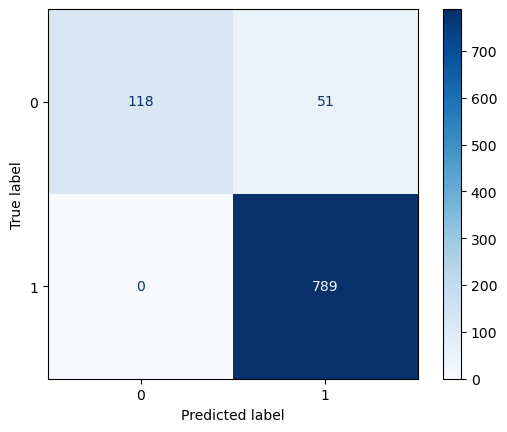

In [92]:
# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

# Display the confusion matrix
disp.plot(cmap=plt.cm.Blues)
#plt.figure(figsize=(10,10))
#plt.show()

From the evaluation result on the test set, we can find that the prediction performance is very poor on the test set. 
The accuracy is only about 32% on the test set
